In [993]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from collections import Counter
from ast import literal_eval
import itertools

In [994]:
# reading datasets
bb_usage = pd.read_csv("data/user_profile/BB_Usage_Categorical.csv")
voice_onnet_incoming_usage = pd.read_csv("data/user_profile/VOICE_ONNET_INCOMING_Usage_Categorical.csv")
voice_onnet_outgoing_usage = pd.read_csv("data/user_profile/VOICE_ONNET_OUTGOING_Usage_Categorical.csv")
voice_offnet_incoming_usage = pd.read_csv("data/user_profile/VOICE_OFFNET_INCOMING_Usage_Categorical.csv")
voice_offnet_outgoing_usage = pd.read_csv("data/user_profile/VOICE_OFFNET_OUTGOING_Usage_Categorical.csv")
voice_IDD_incoming_usage = pd.read_csv("data/user_profile/VOICE_IDD_Incoming_Usage_Categorical.csv")
voice_IDD_outgoing_usage = pd.read_csv("data/user_profile/VOICE_IDD_Outgoing_Usage_Categorical.csv")
peo_tv_usage = pd.read_csv("data/user_profile/PEO_TV_Usage_Categorical.csv")

In [995]:
# locations
bb_location = pd.read_csv("data/user_profile/BB_USAGE_Locations_of_Users.csv")
voice_onnet_incoming_location = pd.read_csv("data/user_profile/VOICE_ONNET_INCOMING_Locations_of_Users.csv")
voice_onnet_outgoing_location = pd.read_csv("data/user_profile/VOICE_ONNET_OUTGOING_Locations_of_Users.csv")
voice_offnet_incoming_location = pd.read_csv("data/user_profile/VOICE_OFFNET_INCOMING_Locations_of_Users.csv")
voice_offnet_outgoing_location = pd.read_csv("data/user_profile/VOICE_OFFNET_OUTGOING_Locations_of_Users.csv")
voice_IDD_incoming_location = pd.read_csv("data/user_profile/VOICE_IDD_INCOMING_Locations_of_Users.csv")
peo_tv_location = pd.read_csv("data/user_profile/PEO_TV_Locations_of_Users.csv")

In [996]:
# user demographics
demo_df = pd.read_csv("data/user_profile/user_demographics_final.csv")

In [997]:
# VAS
megaline_agg_df = pd.read_csv("data/user_profile/Megaline_Packages.csv")
ftth_agg_df = pd.read_csv("data/user_profile/FTTH_Packages.csv")
## LTE Packages
## BB Packages
vas_agg_df = pd.read_csv("data/user_profile/Paid_Vas_Packages.csv")
package_df = pd.read_csv("data/user_profile/Package_Final_list.csv")

In [998]:
# Subscription Types
sub_df = pd.read_csv("data/user_profile/User_Subscription_Map.csv")
promo_change_df = pd.read_csv("data/user_profile/User_Subscription_Changes.csv")

In [999]:
#Extra GB Usage BB
extra_GB_df = pd.read_csv("data/user_profile/BB_extra_GB_usage.csv")

In [1000]:
# Peo TV Extra Channel Usage
extra_Peo_df = pd.read_csv("data/user_profile/Peo_Extra_Peo_Usage.csv")

In [1001]:
# All customers reference
all_users_df = pd.read_csv("data/user_profile/account_no_map_all.csv")
agg_users_df = pd.read_csv("data/user_profile/account_no_map_agg.csv")

In [ ]:
# User BB Package Map
user_bb_package_df = pd.read_csv("data/user_profile/User_BB_Package_Map.csv")

In [ ]:
# Extra GB Usage Detailed DF
extra_GB_detailed_df = pd.read_csv("data/user_profile/BB_Extra_GB_Usage_Detailed.csv")

# Data perapration

In [1002]:
all_users_df.drop(["Unnamed: 0"],axis=1,inplace=True)
all_users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   event_source.hash  27555 non-null  object
 1   ACCOUNT_NUM.hash   27555 non-null  object
 2   CUSTOMER_REF.hash  27555 non-null  object
dtypes: object(3)
memory usage: 645.9+ KB


In [1003]:
bb_usage.rename(columns={'Unnamed: 0':'event_source.hash'}, inplace="True")
bb_usage = bb_usage[['event_source.hash','Usage_Rating_Categorical','Usage_Rating_Scaled']]
#bb_usage.drop_duplicates("event_source.hash", inplace=True)
bb_usage.drop([0,1], axis=0, inplace=True)
# bb_usage

In [1004]:
voice_onnet_incoming_usage = voice_onnet_incoming_usage[['event_source.hash','Usage_Rating_Categorical','Usage_Rating_Scaled','Outlier']]
#voice_onnet_incoming_usage.drop_duplicates("event_source.hash", inplace=True)
# voice_onnet_incoming_usage

In [1005]:
voice_onnet_outgoing_usage = voice_onnet_outgoing_usage[['event_source.hash','Usage_Rating_Categorical','Usage_Rating_Scaled','Outlier']]
#voice_onnet_outgoing_usage.drop_duplicates("event_source.hash", inplace=True)
# voice_onnet_outgoing_usage

In [1006]:
voice_offnet_incoming_usage = voice_offnet_incoming_usage[['event_source.hash','Usage_Rating_Categorical','Usage_Rating_Scaled','Outlier']]
#voice_offnet_incoming_usage.drop_duplicates("event_source.hash", inplace=True)
# voice_offnet_incoming_usage

In [1007]:
voice_offnet_outgoing_usage = voice_offnet_outgoing_usage[['event_source.hash','Usage_Rating_Categorical','Usage_Rating_Scaled','Outlier']]
#voice_offnet_outgoing_usage.drop_duplicates("event_source.hash", inplace=True)
#voice_offnet_outgoing_usage

In [1008]:
voice_IDD_incoming_usage = voice_IDD_incoming_usage[['event_source.hash','Usage_Rating_Categorical','Usage_Rating_Scaled','Outlier','incoming_country']]
voice_IDD_incoming_usage.rename(columns={"incoming_country":"IDD_incoming_country"}, inplace=True)
#voice_IDD_incoming_usage.drop_duplicates("event_source.hash", inplace=True)
#voice_IDD_incoming_usage

In [1009]:
voice_IDD_outgoing_usage = voice_IDD_outgoing_usage[['event_source.hash','Usage_Rating_Categorical','Usage_Rating_Scaled','Outlier',"Revenue_on_Usage_Cumulative","outgoing_country"]]
voice_IDD_outgoing_usage.rename(columns={"outgoing_country":"IDD_outgoing_country","Revenue_on_Usage_Cumulative":"IDD_outgoing_Cumulative_Revenue"}, inplace=True)
#voice_IDD_outgoing_usage.drop_duplicates("event_source.hash", inplace=True)
#voice_IDD_outgoing_usage

In [1010]:
peo_tv_usage = peo_tv_usage[['Phone_Number.hash','Peo_TV_Package','Usage_Rating_Categorical','Usage_Rating_Scaled']]
#peo_tv_usage.drop_duplicates("Phone_Number.hash", inplace=True)
#peo_tv_usage

In [1011]:
# location from voice onnet outgoing
# justification: this has the max no of subscribers
voice_offnet_incoming_location = voice_offnet_incoming_location[['event_source.hash','Location_Identifier']]
voice_offnet_incoming_location.drop_duplicates("event_source.hash", inplace=True)
#voice_onnet_outgoing_location

In [1012]:
demo_df.drop(["Unnamed: 0"], axis=1,inplace=True)

In [1013]:
megaline_agg_df.drop(["Unnamed: 0"], axis=1,inplace=True)
ftth_agg_df.drop(["Unnamed: 0"], axis=1,inplace=True)
vas_agg_df.drop(["Unnamed: 0"], axis=1,inplace=True)
package_df.drop(["Unnamed: 0"], axis=1,inplace=True)

In [1014]:
agg_users_df.drop(["Unnamed: 0"], axis=1,inplace=True)
sub_df.drop(["Unnamed: 0"], axis=1,inplace=True)
promo_change_df.drop(["Unnamed: 0"], axis=1,inplace=True)

## Mapping Acc No to Usage DFs

In [1015]:
peo_tv_usage = peo_tv_usage.merge(all_users_df, how="left",left_on="Phone_Number.hash", right_on="event_source.hash")
peo_tv_usage = peo_tv_usage[peo_tv_usage['ACCOUNT_NUM.hash'].notna()]
peo_tv_usage.drop("Phone_Number.hash",axis=1,inplace=True)

In [1016]:
voice_IDD_outgoing_usage = voice_IDD_outgoing_usage.merge(all_users_df, how="left",on="event_source.hash")
voice_IDD_outgoing_usage = voice_IDD_outgoing_usage[voice_IDD_outgoing_usage['ACCOUNT_NUM.hash'].notna()]
voice_IDD_outgoing_usage.drop("event_source.hash",axis=1,inplace=True)

In [1017]:
voice_IDD_incoming_usage = voice_IDD_incoming_usage.merge(all_users_df, how="left",on="event_source.hash")
voice_IDD_incoming_usage = voice_IDD_incoming_usage[voice_IDD_incoming_usage['ACCOUNT_NUM.hash'].notna()]
voice_IDD_incoming_usage.drop("event_source.hash",axis=1,inplace=True)

In [1018]:
voice_onnet_outgoing_location = voice_onnet_outgoing_location.merge(all_users_df, how="left",on="event_source.hash")
voice_onnet_outgoing_location = voice_onnet_outgoing_location[voice_onnet_outgoing_location['ACCOUNT_NUM.hash'].notna()]
voice_onnet_outgoing_location.drop("event_source.hash",axis=1,inplace=True)

In [1019]:
voice_offnet_outgoing_usage = voice_offnet_outgoing_usage.merge(all_users_df, how="left",on="event_source.hash")
voice_offnet_outgoing_usage = voice_offnet_outgoing_usage[voice_offnet_outgoing_usage['ACCOUNT_NUM.hash'].notna()]
voice_offnet_outgoing_usage.drop("event_source.hash",axis=1,inplace=True)

In [1020]:
voice_offnet_incoming_usage = voice_offnet_incoming_usage.merge(all_users_df, how="left",on="event_source.hash")
voice_offnet_incoming_usage = voice_offnet_incoming_usage[voice_offnet_incoming_usage['ACCOUNT_NUM.hash'].notna()]
voice_offnet_incoming_usage.drop("event_source.hash",axis=1,inplace=True)

In [1021]:
voice_onnet_outgoing_usage = voice_onnet_outgoing_usage.merge(all_users_df, how="left",on="event_source.hash")
voice_onnet_outgoing_usage = voice_onnet_outgoing_usage[voice_onnet_outgoing_usage['ACCOUNT_NUM.hash'].notna()]
voice_onnet_outgoing_usage.drop("event_source.hash",axis=1,inplace=True)

In [1022]:
voice_onnet_incoming_usage = voice_onnet_incoming_usage.merge(all_users_df, how="left",on="event_source.hash")
voice_onnet_incoming_usage = voice_onnet_incoming_usage[voice_onnet_incoming_usage['ACCOUNT_NUM.hash'].notna()]
voice_onnet_incoming_usage.drop("event_source.hash",axis=1,inplace=True)

In [1023]:
voice_onnet_incoming_location = voice_onnet_incoming_location.merge(all_users_df, how="left",on="event_source.hash")
voice_onnet_incoming_location = voice_onnet_incoming_location[voice_onnet_incoming_location['ACCOUNT_NUM.hash'].notna()]
voice_onnet_incoming_location.drop("event_source.hash",axis=1,inplace=True)

In [1024]:
voice_offnet_incoming_location = voice_offnet_incoming_location.merge(all_users_df, how="left",on="event_source.hash")
voice_offnet_incoming_location = voice_offnet_incoming_location[voice_offnet_incoming_location['ACCOUNT_NUM.hash'].notna()]
voice_offnet_incoming_location.drop("event_source.hash",axis=1,inplace=True)

In [1025]:
voice_offnet_outgoing_location = voice_offnet_outgoing_location.merge(all_users_df, how="left",on="event_source.hash")
voice_offnet_outgoing_location = voice_offnet_outgoing_location[voice_offnet_outgoing_location['ACCOUNT_NUM.hash'].notna()]
voice_offnet_outgoing_location.drop("event_source.hash",axis=1,inplace=True)

In [1026]:
bb_usage = bb_usage.merge(all_users_df, how="left",on="event_source.hash")
bb_usage = bb_usage[bb_usage['ACCOUNT_NUM.hash'].notna()]
bb_usage.drop("event_source.hash",axis=1,inplace=True)

In [1027]:
# user location 
print(bb_usage.shape)
print(voice_onnet_incoming_usage.shape)
print(voice_onnet_outgoing_usage.shape)
print(voice_offnet_incoming_usage.shape) # selected for loc merge
print(voice_offnet_outgoing_usage.shape)
print(voice_IDD_incoming_usage.shape)
print(peo_tv_usage.shape)

(1221, 4)
(3042, 5)
(3078, 5)
(3114, 5)
(3015, 5)
(1558, 6)
(1249, 6)


In [1028]:
print(bb_location.shape)
print(voice_onnet_incoming_location.shape)
print(voice_onnet_outgoing_location.shape)
print(voice_offnet_incoming_location.shape) # selected for loc merge
print(voice_offnet_outgoing_location.shape)
print(voice_IDD_incoming_location.shape)
print(peo_tv_location.shape)

(1306, 3)
(3042, 4)
(3078, 4)
(3114, 3)
(3015, 4)
(1632, 3)
(1428, 4)


In [1029]:
voice_offnet_incoming_usage = voice_offnet_incoming_usage[["ACCOUNT_NUM.hash","CUSTOMER_REF.hash","Usage_Rating_Scaled","Usage_Rating_Categorical","Outlier"]]

# User Profile : Usage

In [1030]:
usage_df = voice_offnet_incoming_usage.merge(voice_offnet_outgoing_usage,how='left', on=['ACCOUNT_NUM.hash','CUSTOMER_REF.hash'])
usage_df.rename(columns={'Usage_Rating_Categorical_x':'OFFNET_INCOMING_Categorical', 'Usage_Rating_Categorical_y':'OFFNET_OUTGOING_Categorical',
                         'Usage_Rating_Scaled_x':'OFFNET_INCOMING_Scaled','Usage_Rating_Scaled_y':'OFFNET_OUTGOING_Scaled',
                         'Outlier_x':'OFFNET_INCOMING_Outlier','Outlier_y':'OFFNET_OUTGOING_Outlier'}, inplace="True")
usage_df.drop_duplicates("ACCOUNT_NUM.hash",inplace=True)

In [1031]:
usage_df = usage_df.merge(voice_onnet_incoming_usage,how='left', on=['ACCOUNT_NUM.hash','CUSTOMER_REF.hash'])
usage_df.rename(columns={'Usage_Rating_Categorical':'ONNET_INCOMING_Categorical','Usage_Rating_Scaled':'ONNET_INCOMING_Scaled', 'Outlier':'ONNET_INCOMING_Outlier'}, inplace="True")
usage_df.drop_duplicates("ACCOUNT_NUM.hash",inplace=True)

In [1032]:
usage_df = usage_df.merge(voice_onnet_outgoing_usage,how='left', on=['ACCOUNT_NUM.hash','CUSTOMER_REF.hash'])
usage_df.rename(columns={'Usage_Rating_Categorical':'ONNET_OUTGOING_Categorical','Usage_Rating_Scaled':'ONNET_OUTGOING_Scaled','Outlier':'ONNET_OUTGOING_Outlier'}, inplace="True")
usage_df.drop_duplicates("ACCOUNT_NUM.hash",inplace=True)

In [1033]:
usage_df = usage_df.merge(voice_IDD_incoming_usage,how='left', on=['ACCOUNT_NUM.hash','CUSTOMER_REF.hash'])
usage_df.rename(columns={'Usage_Rating_Categorical':'IDD_INCOMING_Categorical','Usage_Rating_Scaled':'IDD_INCOMING_Scaled','Outlier':'IDD_INCOMING_Outlier'}, inplace="True")
usage_df.drop_duplicates("ACCOUNT_NUM.hash",inplace=True)

In [1034]:
usage_df = usage_df.merge(voice_IDD_outgoing_usage,how='left', on=['ACCOUNT_NUM.hash','CUSTOMER_REF.hash'])
usage_df.rename(columns={'Usage_Rating_Categorical':'IDD_OUTGOING_Categorical','Usage_Rating_Scaled':'IDD_OUTGOING_Scaled','Outlier':'IDD_OUTGOING_Outlier'}, inplace="True")
usage_df.drop_duplicates("ACCOUNT_NUM.hash",inplace=True)

In [1035]:
usage_df = usage_df.merge(peo_tv_usage,how='left', on=['ACCOUNT_NUM.hash','CUSTOMER_REF.hash'])
usage_df.rename(columns={'Usage_Rating_Categorical':'PEO_TV_Categorical','Usage_Rating_Scaled':'PEO_TV_Scaled'}, inplace="True")
usage_df.drop_duplicates("ACCOUNT_NUM.hash",inplace=True)

In [1036]:
# merege BB usage
usage_df = usage_df.merge(bb_usage,how='left', on=['ACCOUNT_NUM.hash','CUSTOMER_REF.hash'])
usage_df.rename(columns={'Usage_Rating_Categorical':'BB_Categorical','Usage_Rating_Scaled':'BB_Scaled'}, inplace="True")
usage_df.drop_duplicates("ACCOUNT_NUM.hash",inplace=True)

In [1037]:
# merge user location identifier
usage_df = usage_df.merge(voice_offnet_incoming_location,how='left', on=['ACCOUNT_NUM.hash','CUSTOMER_REF.hash'])

In [1038]:
usage_df.drop_duplicates("ACCOUNT_NUM.hash",inplace=True)

# Adding New Data

### Adding demographics

In [1039]:
demo_df.drop(["event_source.hash"],axis=1, inplace=True)

In [1040]:
usage_df = usage_df.merge(demo_df,how='left', on=['ACCOUNT_NUM.hash','CUSTOMER_REF.hash'])

In [1041]:
usage_df[["BIRTH_YEAR","AGE"]].describe()

,BIRTH_YEAR,AGE
count,2287.000000,2287.000000
mean,1964.070835,56.929165
std,14.777062,14.777062
min,1900.000000,21.000000
25%,1954.000000,46.000000
50%,1965.000000,56.000000
75%,1975.000000,67.000000
max,2000.000000,121.000000


<AxesSubplot:ylabel='Density'>

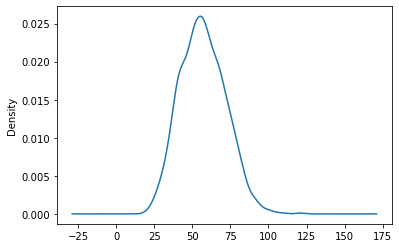

In [1042]:
usage_df["AGE"].plot(kind = 'density')

<AxesSubplot:ylabel='Density'>

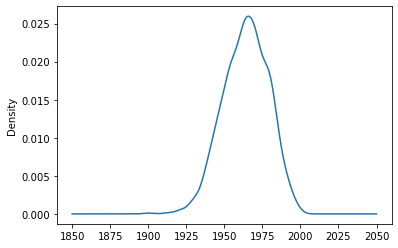

In [1043]:
usage_df["BIRTH_YEAR"].plot(kind = 'density')

### Demographic Information

- 2287 users have demographic info (age, Birth Year, Gender)
- Users born from **1900**-2001 
- Age vary from 21 y.o. to **121 y.o**
- Mean Age - 56 y.o
- 75% of users are less than 68 y.o.
- Mostly middle aged, and aged customers

## Voice Usage Bins

In [1044]:
usage_df["ONNET_INCOMING_Categorical"].value_counts()

LOW       1593
MEDIUM    1193
HIGH       110
Name: ONNET_INCOMING_Categorical, dtype: int64

In [1045]:
def voice_bin(incoming,outgoing):
    if incoming=="LOW" and outgoing=="LOW":
        return "LOW"
    if incoming=="HIGH" and outgoing=="HIGH":
        return "HIGH"
    if (incoming=="HIGH" and outgoing=="MEDIUM") or (incoming=="MEDIUM" and outgoing=="HIGH"):
        return "HIGH"
    if incoming=="MEDIUM" and outgoing=="MEDIUM":
        return "MEDIUM"
    if (incoming=="MEDIUM" and outgoing=="LOW") or (incoming=="LOW" and outgoing=="MEDIUM"):
        return "LOW"
    if (incoming=="LOW" and outgoing=="HIGH") or (incoming=="HIGH" and outgoing=="LOW"):
        return "MEDIUM"
    if (isinstance(incoming,float) and not isinstance(outgoing,float)) or (not isinstance(incoming,float) and isinstance(outgoing,float)):
        return "LOW"
#     if (isinstance(incoming,float) and isinstance(outgoing,float)):
#         return "NO"

In [1046]:
# test
voice_bin("LOW","HIGH")

'MEDIUM'

In [1047]:
usage_df["ONNET_Overall_Categorical"] = usage_df.apply(lambda x: voice_bin(x["ONNET_INCOMING_Categorical"], x["ONNET_OUTGOING_Categorical"]), axis=1)

In [1048]:
usage_df["OFFNET_Overall_Categorical"] = usage_df.apply(lambda x: voice_bin(x["OFFNET_INCOMING_Categorical"], x["OFFNET_OUTGOING_Categorical"]), axis=1)

In [1049]:
usage_df["IDD_Overall_Categorical"] = usage_df.apply(lambda x: voice_bin(x["IDD_INCOMING_Categorical"], x["IDD_OUTGOING_Categorical"]), axis=1)

In [1050]:
def voice_overall_bin(call_usage):
    counts = Counter(call_usage)
    if counts["LOW"] > 1:
        return "LOW"
    elif counts["HIGH"] > 1:
        return "HIGH"
    elif counts["MEDIUM"] > 1:
        return "MEDIUM"
    elif counts["LOW"] == 1 and counts["MEDIUM"] == 1 and counts["HIGH"] == 1:
        return "MEDIUM"
    elif counts["LOW"] == 1 and counts["MEDIUM"] == 1:
        return "LOW"
    elif counts["MEDIUM"] == 1 and counts["HIGH"] == 1:
        return "MEDIUM"

In [1051]:
# test
voice_overall_bin(["HIGH","HIGH","NO"])

'HIGH'

In [1052]:
usage_df["VOICE_Categorical"] = usage_df.apply(lambda x: voice_overall_bin([x["ONNET_Overall_Categorical"], x["OFFNET_Overall_Categorical"], x["IDD_Overall_Categorical"]]), axis=1)

In [1053]:
usage_df[(usage_df["VOICE_Categorical"] == "NO")]

,ACCOUNT_NUM.hash,CUSTOMER_REF.hash,OFFNET_INCOMING_Scaled,OFFNET_INCOMING_Categorical,OFFNET_INCOMING_Outlier,OFFNET_OUTGOING_Categorical,OFFNET_OUTGOING_Scaled,OFFNET_OUTGOING_Outlier,ONNET_INCOMING_Categorical,ONNET_INCOMING_Scaled,...,BB_Categorical,BB_Scaled,Location_Identifier,GENDER,BIRTH_YEAR,AGE,ONNET_Overall_Categorical,OFFNET_Overall_Categorical,IDD_Overall_Categorical,VOICE_Categorical


## Subscrition Types

In [1054]:
usage_df = usage_df.merge(sub_df,how='left',on=["ACCOUNT_NUM.hash"])

In [1055]:
def check_product_level(voice,bb,tv):
    if not isinstance(voice,float): 
        if bb=="NO" and tv=="NO":
            return "SINGLE_PLAY"
        if bb != "NO" and tv == "NO":
            return "DOUBLE_PLAY_BV"
        if bb == "NO" and tv != "NO":
            return "DOUBLE_PLAY_PV"
        if bb != "NO" and tv != "NO":
            return "TRIPLE_PLAY"

In [1056]:
# test
check_product_level("LOW","HIGH","NO")

'DOUBLE_PLAY_BV'

In [1057]:
usage_df["Play_Type"] = usage_df.apply(lambda x: check_product_level(x["VOICE_Categorical"], x["BB_Categorical"], x["PEO_TV_Categorical"]), axis=1)

In [1058]:
# play usage
def play_usage(usage):
    if len(usage)>2:
        new_usage=[]
        for el in usage:
            if isinstance(el,float) or el=="nan" or el==None:
                new_usage.append("NO_INFO")
            else:
                new_usage.append(el)
        return [f"VOICE_{new_usage[0]}", f"BB_{new_usage[1]}", f"TV_{new_usage[2]}"]
    else:
        return "ERR"

In [1059]:
# test
play_usage(["LOW","HIGH","LOW"])

['VOICE_LOW', 'BB_HIGH', 'TV_LOW']

In [1060]:
usage_df["Sub_Usage"] = usage_df.apply(lambda x: play_usage([x["VOICE_Categorical"], x["BB_Categorical"], x["PEO_TV_Categorical"]]), axis=1)

In [1061]:
usage_df[["Sub_Type","Play_Type"]].value_counts()

Sub_Type        Play_Type     
TRIPLE_PLAY     TRIPLE_PLAY       229
SINGLE_PLAY     TRIPLE_PLAY       164
DOUBLE_PLAY_PV  TRIPLE_PLAY       140
DOUBLE_PLAY_BV  TRIPLE_PLAY       113
                DOUBLE_PLAY_BV     27
SINGLE_PLAY     DOUBLE_PLAY_BV     25
DOUBLE_PLAY_PV  DOUBLE_PLAY_BV     18
TRIPLE_PLAY     DOUBLE_PLAY_BV     15
4G              TRIPLE_PLAY         1
dtype: int64

In [1062]:
def check_sub_type(sub):
    if isinstance(sub, float):
        return "Assumed"
    else:
        return "Actual"

In [1063]:
usage_df["Sub_Type_State"]=usage_df["Sub_Type"].apply(lambda x: check_sub_type(x))

In [1064]:
def merge_sub_types(sub1,sub2):
    if isinstance(sub1, float):
        return sub2
    else:
        return sub1

In [1065]:
usage_df["Sub_Type"] = usage_df.apply(lambda x: merge_sub_types(x["Sub_Type"], x["Play_Type"]), axis=1)

In [1066]:
usage_df.drop(["Play_Type"],axis=1,inplace=True)

In [1067]:
usage_df["Sub_Type_State"].value_counts()

Assumed    2248
Actual      732
Name: Sub_Type_State, dtype: int64

In [1068]:
usage_df["Sub_Type"].value_counts()

TRIPLE_PLAY       2379
DOUBLE_PLAY_BV     253
SINGLE_PLAY        189
DOUBLE_PLAY_PV     158
4G                   1
Name: Sub_Type, dtype: int64

<AxesSubplot:ylabel='Sub_Type'>

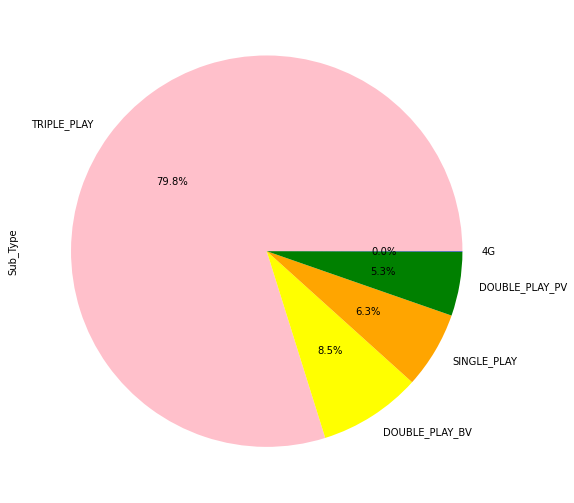

In [1069]:
usage_df["Sub_Type"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%', colors=['pink','yellow','orange','green','blue'])

### Note

- Actual Subscription information - for **732** Subscribers
- Assumed on usage - **2248**

### Wait! Contradiction??

In [1070]:
usage_df[(usage_df["Sub_Type"] == "DOUBLE_PLAY_PV")]["BB_Categorical"].value_counts()

LOW       21
HIGH       2
MEDIUM     1
Name: BB_Categorical, dtype: int64

In [1071]:
usage_df[(usage_df["Sub_Type"] == "SINGLE_PLAY")]["BB_Categorical"].value_counts()

LOW       12
HIGH       5
MEDIUM     5
Name: BB_Categorical, dtype: int64

In [1072]:
usage_df[(usage_df["Sub_Type"] == "SINGLE_PLAY")]["PEO_TV_Categorical"].value_counts()

NO        25
LOW        8
MEDIUM     6
HIGH       3
Name: PEO_TV_Categorical, dtype: int64

In [1073]:
usage_df[(usage_df["Sub_Type"] == "DOUBLE_PLAY_BV")]["PEO_TV_Categorical"].value_counts()

NO        140
MEDIUM      3
LOW         3
HIGH        1
Name: PEO_TV_Categorical, dtype: int64

### Why??
- These subscribers may have used the services within 2019-01 to 2021-01 and however downgraded thier services by the time of BSS dataset has generated

### Dropping contradictory subscribers

In [1074]:
usage_df = usage_df.drop(usage_df[(usage_df["Sub_Type"] == "DOUBLE_PLAY_PV") & (usage_df["BB_Categorical"].notna())].index)

In [1075]:
usage_df[(usage_df["Sub_Type"] == "DOUBLE_PLAY_PV")]["BB_Categorical"].value_counts()

Series([], Name: BB_Categorical, dtype: int64)

In [1076]:
usage_df = usage_df.drop(usage_df[(usage_df["Sub_Type"] == "SINGLE_PLAY") & (usage_df["BB_Categorical"].notna())].index)

In [1077]:
usage_df[(usage_df["Sub_Type"] == "SINGLE_PLAY")]["BB_Categorical"].value_counts()

Series([], Name: BB_Categorical, dtype: int64)

In [1078]:
usage_df = usage_df.drop(usage_df[(usage_df["Sub_Type"] == "SINGLE_PLAY") & (usage_df["PEO_TV_Categorical"] != "NO") & (usage_df["PEO_TV_Categorical"].notna())].index)

In [1079]:
usage_df[(usage_df["Sub_Type"] == "SINGLE_PLAY")]["PEO_TV_Categorical"].value_counts()

NO    21
Name: PEO_TV_Categorical, dtype: int64

In [1080]:
usage_df = usage_df.drop(usage_df[(usage_df["Sub_Type"] == "DOUBLE_PLAY_BV") & (usage_df["PEO_TV_Categorical"] != "NO") & (usage_df["PEO_TV_Categorical"].notna())].index)

In [1081]:
usage_df[(usage_df["Sub_Type"] == "DOUBLE_PLAY_BV")]["PEO_TV_Categorical"].value_counts()

NO    140
Name: PEO_TV_Categorical, dtype: int64

In [1082]:
usage_df["Sub_Type"].value_counts()

TRIPLE_PLAY       2379
DOUBLE_PLAY_BV     246
SINGLE_PLAY        156
DOUBLE_PLAY_PV     134
4G                   1
Name: Sub_Type, dtype: int64

## Service Packages and VAS
- categories derived from "Product State Changes" and "VAS" datasets

In [1083]:
usage_df = usage_df.merge(megaline_agg_df,how='left', on='ACCOUNT_NUM.hash')

In [1084]:
usage_df = usage_df.merge(ftth_agg_df,how='left', on='ACCOUNT_NUM.hash')

In [1085]:
usage_df.Package_Type_x.fillna(usage_df.Package_Type_y,inplace=True)
usage_df.MEDIUM_x.fillna(usage_df.MEDIUM_y,inplace=True)

In [1086]:
usage_df.drop(["Package_Type_y","MEDIUM_y"],axis=1, inplace=True)
usage_df.rename(columns={"Package_Type_x":"Package_Type","MEDIUM_x":"MEDIUM"},inplace=True)

In [1087]:
vas_agg_df.rename(columns={"Package":"VAS_Package","Month_Subscribed":"VAS_Month_Subscribed","Rental":"VAS_Rental",\
                          "One_Time_Charge":"VAS_One_Time_Charge"},inplace=True)

In [1088]:
usage_df = usage_df.merge(vas_agg_df,how='left', on='ACCOUNT_NUM.hash')

In [1089]:
usage_df.Package_Type_x.fillna(usage_df.Package_Type_y,inplace=True)

In [1090]:
usage_df.drop(["Package_Type_y"],axis=1, inplace=True)
usage_df.rename(columns={"Package_Type_x":"Package_Type"},inplace=True)

## Subscription upgrades and Downgrades

In [1091]:
promo_change_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ACCOUNT_NUM.hash   758 non-null    object
 1   Sub_Update_Date    758 non-null    object
 2   Sub_Update_Status  758 non-null    object
 3   Sub_Update         758 non-null    object
dtypes: object(4)
memory usage: 23.8+ KB


In [1092]:
usage_df = usage_df.merge(promo_change_df,how='left', on='ACCOUNT_NUM.hash')

In [1093]:
usage_df[["Sub_Update_Status","Sub_Update"]].value_counts()

Sub_Update_Status    Sub_Update                      
Promotion Downgrade  DOUBLE_PLAY_BV -> SINGLE_PLAY       129
Promotion Upgrade    DOUBLE_PLAY_PV -> TRIPLE_PLAY       127
                     SINGLE_PLAY -> DOUBLE_PLAY_BV       109
Promotion Downgrade  TRIPLE_PLAY -> DOUBLE_PLAY_PV        72
Promotion Upgrade    DOUBLE_PLAY_BV -> TRIPLE_PLAY        69
                     SINGLE_PLAY -> DOUBLE_PLAY_PV        62
Promotion Downgrade  TRIPLE_PLAY -> SINGLE_PLAY           32
Promotion Upgrade    SINGLE_PLAY -> TRIPLE_PLAY           25
Promotion Downgrade  DOUBLE_PLAY_PV -> SINGLE_PLAY        21
                     TRIPLE_PLAY -> DOUBLE_PLAY_BV        12
Promotion Upgrade    DOUBLE_PLAY_PV -> DOUBLE_PLAY_BV      1
                     4G -> 4G                              1
dtype: int64

<AxesSubplot:ylabel='None'>

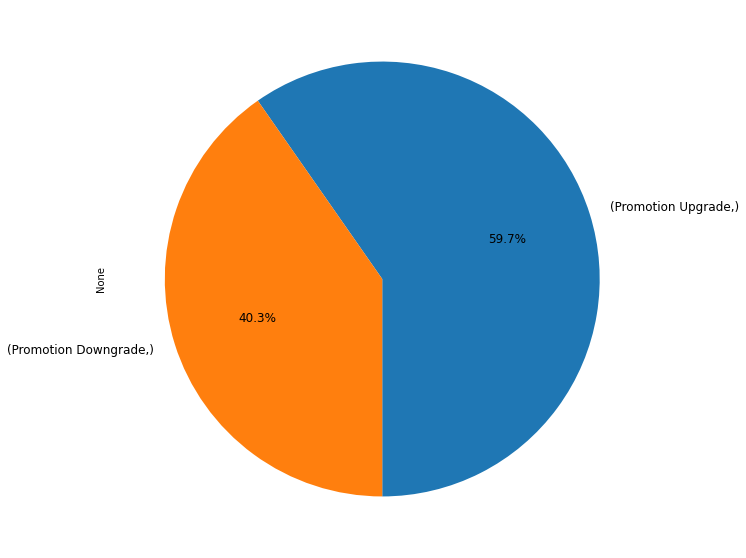

In [1094]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)
usage_df[["Sub_Update_Status"]].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12)

## BB Extra GB Purchased

In [1095]:
extra_GB_df.drop(["Unnamed: 0"],axis=1, inplace=True)
extra_GB_df.rename(columns={"Month_Subscribed":"BB_Extra_GB_Purchased_Month","Rental":"BB_Extra_GB_Rental"}, inplace=True)

In [1096]:
extra_GB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7679 entries, 0 to 7678
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ACCOUNT_NUM.hash             7679 non-null   object 
 1   VAS                          7679 non-null   object 
 2   BB_Extra_GB_Purchased_Month  7679 non-null   object 
 3   BB_Extra_GB_Rental           2307 non-null   float64
dtypes: float64(1), object(3)
memory usage: 240.1+ KB


In [1097]:
extra_GB_df["BB_Extra_GB_Usage_Times"] = 1

In [1098]:
extra_GB_agg_df = extra_GB_df.groupby('ACCOUNT_NUM.hash', as_index=False).agg(list)

In [1099]:
extra_GB_agg_df['BB_Extra_GB_Usage_Times'] = extra_GB_agg_df.apply(lambda x: len(x['BB_Extra_GB_Usage_Times']), axis=1)

In [1100]:
def list_zipper(list1,list2):
    return dict(zip(list1,list2))

In [1101]:
extra_GB_agg_df['BB_Extra_GB_Month_vs_Rental'] = extra_GB_agg_df.apply(lambda x: list_zipper(x['BB_Extra_GB_Purchased_Month'],x['BB_Extra_GB_Rental']), axis=1)

In [1102]:
extra_GB_agg_df.drop(["BB_Extra_GB_Purchased_Month","BB_Extra_GB_Rental","VAS"],axis=1, inplace=True)

In [1103]:
scaler = MinMaxScaler()
extra_GB_agg_df["BB_Extra_GB_Purchased_Scaled"] = scaler.fit_transform(extra_GB_agg_df["BB_Extra_GB_Usage_Times"].values.reshape(-1,1))

In [1104]:
extra_GB_agg_df["BB_Extra_GB_Purchased_Scaled"] = extra_GB_agg_df["BB_Extra_GB_Purchased_Scaled"].apply(lambda x: 0.01 if x==0.0 else x)

In [1105]:
extra_GB_agg_df["BB_Extra_GB_Purchased_Scaled"].describe()

count    1527.000000
mean        0.013688
std         0.038370
min         0.001431
25%         0.010000
50%         0.010000
75%         0.010000
max         1.000000
Name: BB_Extra_GB_Purchased_Scaled, dtype: float64

In [1106]:
# binning
bins = [0, 0.33, 0.66,1]
labels = ['LOW','MEDIUM','HIGH']
extra_GB_agg_df['BB_Extra_GB_Purchase_Categorical'] = pd.cut(extra_GB_agg_df['BB_Extra_GB_Purchased_Scaled'], bins=bins, labels=labels)

In [1107]:
extra_GB_agg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1527 entries, 0 to 1526
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   ACCOUNT_NUM.hash                  1527 non-null   object  
 1   BB_Extra_GB_Usage_Times           1527 non-null   int64   
 2   BB_Extra_GB_Month_vs_Rental       1527 non-null   object  
 3   BB_Extra_GB_Purchased_Scaled      1527 non-null   float64 
 4   BB_Extra_GB_Purchase_Categorical  1527 non-null   category
dtypes: category(1), float64(1), int64(1), object(2)
memory usage: 61.2+ KB


In [1108]:
usage_df = usage_df.merge(extra_GB_agg_df,how='left', on='ACCOUNT_NUM.hash')

### Note
- Considered Extra GB Purchased time to build rating as there are no enough datsa about rentals

## PeoTV Extra Channels Purchased

In [1109]:
extra_Peo_df.drop(["Unnamed: 0"],axis=1, inplace=True)
extra_Peo_df.rename(columns={"Month_Subscribed":"Peo_Extra_Channels_Purchased_Month","Rental":"Peo_Extra_Channels_Rental"}, inplace=True)

In [1110]:
extra_Peo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   ACCOUNT_NUM.hash                    498 non-null    object
 1   Package                             498 non-null    object
 2   Peo_Extra_Channels_Purchased_Month  498 non-null    object
 3   Peo_Extra_Channels_Rental           498 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 15.7+ KB


In [1111]:
len(extra_Peo_df["ACCOUNT_NUM.hash"].unique())

51

In [1112]:
extra_Peo_agg_df = extra_Peo_df.groupby('ACCOUNT_NUM.hash', as_index=False).agg(list)

In [1113]:
extra_Peo_agg_df['Peo_Extra_Channels_Cumulative_Rental'] = extra_Peo_agg_df.apply(lambda x: sum(x['Peo_Extra_Channels_Rental']), axis=1)

In [1114]:
extra_Peo_agg_df['Peo_Extra_Channels_Month_vs_Rental'] = extra_Peo_agg_df.apply(lambda x: list_zipper(x['Peo_Extra_Channels_Purchased_Month'],x['Peo_Extra_Channels_Rental']), axis=1)

In [1115]:
extra_Peo_agg_df.drop(["Peo_Extra_Channels_Purchased_Month","Peo_Extra_Channels_Rental","Package"],axis=1, inplace=True)

In [1116]:
scaler = MinMaxScaler()
extra_Peo_agg_df["Peo_Extra_Channels_Purchased_Scaled"] = scaler.fit_transform(extra_Peo_agg_df["Peo_Extra_Channels_Cumulative_Rental"].values.reshape(-1,1))

In [1117]:
extra_Peo_agg_df["Peo_Extra_Channels_Purchased_Scaled"] = extra_Peo_agg_df["Peo_Extra_Channels_Purchased_Scaled"].apply(lambda x: 0.01 if x==0.0 else x)

In [1118]:
extra_Peo_agg_df["Peo_Extra_Channels_Purchased_Scaled"].describe()

count    51.000000
mean      0.217098
std       0.170157
min       0.010000
25%       0.087912
50%       0.197802
75%       0.285714
max       1.000000
Name: Peo_Extra_Channels_Purchased_Scaled, dtype: float64

In [1119]:
# binning
bins = [0, 0.33, 0.66,1]
labels = ['LOW','MEDIUM','HIGH']
extra_Peo_agg_df['Peo_Extra_Channels_Purchased_Categorical'] = pd.cut(extra_Peo_agg_df['Peo_Extra_Channels_Purchased_Scaled'], bins=bins, labels=labels)

In [1120]:
extra_Peo_agg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   ACCOUNT_NUM.hash                          51 non-null     object  
 1   Peo_Extra_Channels_Cumulative_Rental      51 non-null     int64   
 2   Peo_Extra_Channels_Month_vs_Rental        51 non-null     object  
 3   Peo_Extra_Channels_Purchased_Scaled       51 non-null     float64 
 4   Peo_Extra_Channels_Purchased_Categorical  51 non-null     category
dtypes: category(1), float64(1), int64(1), object(2)
memory usage: 2.1+ KB


In [1121]:
usage_df = usage_df.merge(extra_Peo_agg_df,how='left', on='ACCOUNT_NUM.hash')

In [1122]:
usage_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2916 entries, 0 to 2915
Data columns (total 66 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   ACCOUNT_NUM.hash                          2916 non-null   object  
 1   CUSTOMER_REF.hash                         2916 non-null   object  
 2   OFFNET_INCOMING_Scaled                    2916 non-null   float64 
 3   OFFNET_INCOMING_Categorical               2916 non-null   object  
 4   OFFNET_INCOMING_Outlier                   2916 non-null   object  
 5   OFFNET_OUTGOING_Categorical               2809 non-null   object  
 6   OFFNET_OUTGOING_Scaled                    2809 non-null   float64 
 7   OFFNET_OUTGOING_Outlier                   2809 non-null   object  
 8   ONNET_INCOMING_Categorical                2833 non-null   object  
 9   ONNET_INCOMING_Scaled                     2833 non-null   float64 
 10  ONNET_INCOMING_Outlier  

# Deriving Contextual Features

## Socio-Economic features

In [1123]:
usage_df["VAS_Package"].unique()

array([nan, "['E channeling Registration']",
       "['BB PeoTVGO', 'BB Personal Storage', 'Meet Max']",
       "['BB Detailed Reports ', 'Hotline Service', 'Hotline Time Delayed', 'TSTV', 'Video on Demand', 'IDD', 'Single VAS Bundle', 'BB PeoTVGO', 'BB Personal Storage', 'BB Report Subscription Charge', 'Meet Max']",
       "['BB PeoTVGO']",
       "['Basic1 TeleLife', 'PEO TV GO OTT A la carte channels']",
       "['BB Personal Storage']", "['BB Personal Storage', 'BB PeoTVGO']",
       "['BB PeoTVGO', 'BB Personal Storage']",
       "['BB Personal Storage', 'BB PeoTVGO', 'PEO TV GO OTT A la carte channels']",
       "['Sisu Connect', 'BB PeoTVGO', 'Basic1 TeleLife', 'BB Personal Storage', 'Meet Lite']",
       "['BB SLT Film Hall Service', 'BB PeoTVGO', 'BB Personal Storage']",
       "['Plus1 TeleLife', 'Basic1 TeleLife', 'BB PeoTVGO', 'BB Personal Storage', 'Meet Lite']",
       "['E channeling Registration', 'BB Personal Storage', 'BB PeoTVGO']",
       "['BB PeoTVGO', 'Meet Lite

In [1124]:
usage_df["Megaline_Package"].unique()

array(["['AB Copper Access Bearer']",
       "['SLT PeoTV Service', 'AB Megaline', 'AB Copper Access Bearer', 'BB SLT BroadBand Service', 'AB WireLess Access']",
       "['BB SLT BroadBand Service', 'AB Copper Access Bearer']",
       "['AB Copper Access Bearer', 'SLT PeoTV Service']",
       "['SLT PeoTV Service', 'AB Copper Access Bearer', 'BB SLT BroadBand Service']",
       "['BB SLT BroadBand Service', 'AB Copper Access Bearer', 'SLT PeoTV Service']",
       "['AB Copper Access Bearer', 'SLT PeoTV Service', 'BB SLT BroadBand Service']",
       "['SLT PeoTV Service', 'AB Copper Access Bearer']",
       "['AB Copper Access Bearer', 'BB SLT BroadBand Service']",
       "['BB SLT BroadBand Service']",
       "['SLT PeoTV Service', 'BB SLT BroadBand Service', 'AB Copper Access Bearer']",
       nan, "['SLT PeoTV Service', 'BB SLT BroadBand Service']",
       "['SLT PeoTV Service']",
       "['BB SLT BroadBand Service', 'SLT PeoTV Service']",
       "['AB WireLess Access', 'BB SLT Broad

In [1125]:
usage_df["FTTH_Package"].unique()

array([nan, "['AB Fiber Access Bearer']"], dtype=object)

In [1126]:
usage_df["Peo_TV_Package"].unique()

array([nan, 'PEO_ENTERTAINMENT', 'PEO_SILVER', 'PEO_UTHAYAM',
       'PEO_SILVER_PLUS', 'PRANAMA', 'PEO_UNNATHAM',
       'PEO_RELIGIOUS_PACKAGE', 'PEO_PLATINUM', 'NEW_SLT_STAFF_PACKAGE',
       'PEO_TITANIUM', 'SLT_STAFF_TRIPLE_PLAY', 'NEW_YEAR_TREAT',
       'SLTStaff_PEO_SILVER', 'PEO_SILVER_FTTH', 'PEO_GOLD',
       'DOUBLEPROMO', 'LOTUS', 'SLT_STAFF_PEO_UNNATHAM_FTTH',
       'PEO_FAMILY'], dtype=object)

### Having an Insurance?

In [1130]:
def having_insurance(vas):
    insurrence_VAS = ["Telehealth","Basic4 TeleLife","Plus4 TeleLife","Plus1 TeleLife","Basic1 TeleLife","Basic2 TeleLife"]
    if not isinstance(vas,float):
        for s in insurrence_VAS:
            if s in vas:
                return "YES"

In [1131]:
usage_df["Having_Insurance"] = usage_df.apply(lambda x: having_insurance(x["VAS_Package"]), axis=1)

### Household types
- Senior Citizen
  - Age > 55 years (demographics)
  - Peo_TV_Usage - High, Packages: PEO_RELIGIOUS_PACKAGE, PRANAMA
  - Voice call usage - high (in country, europian country, australia,US, canada)
  - Having Insurance: YES
- Kids at Home
  - Age > 30 years (assuming parents)
  - Peo TV Usage - High, packages: PEO_FAMILY, DOUBLEPROMO, PEO_TITANIUM, PEO_GOLD
  - Peo TV VAS: PeoTVGo_Channel Package (Extra Channels purchase)
  - BB Usage: Medium/ High
  - VAS - Sisu_Connect, Edu Lite
- Student (High school/University), Teenagers
  - Age < 27 (demographics)
  - Peo TV Usage - Medium/High packages: PEO_SILVER_PLUS, PEO_SILVER_PLUS_FTTH, PEO_ENTERTAINMENT, PEO_TITANIUM, DOUBLEPROMO, LEISURE_SPORTS
  - BB Usage - High **
  - Extra GB Purchase (High)
  - VAS - Meet Lite, Meet Max 
  - Peo TV VAS: E_Video_on_Demand
  - BB_VAS:  BB_YouTube Bundle, BB_ Entertainment Unlimited,  BB_Messenger Bundle
- Working Professional
  - Age > 22, < 55 (demographics)
  - Peo TV Usage - Medium/High packages: PEO_SILVER_PLUS, PEO_SILVER_PLUS_FTTH, PEO_FAMILY, SLT_STAFF_PEO_UNNATHAM_FTTH, SLT_STAFF_TRIPLE_PLAY, NEW_SLT_STAFF_PACKAGE, BOC
  - BB Usage - High **
  - Extra GB Purchase (all)
  - VAS - Meet Lite, Meet Max, AB_Service Vacation, AB_Referral offer Discount, AB_Citylink Loyalty Rewards
- Family Member Abroad
  - IDD Usage : High
  - IDD Calling Country : Europe/ UAE/ Australia/ Canada/ South and east Asia **
- Race: Tamil
   - Peo TV Usage - PEO_UNNATHAM, PEO_UTHAYAM, SLT_STAFF_PEO_UNNATHAM_FTTH
- Abroad person: country/ countries

## Adding Socio Feature Cols

In [1134]:
def make_categorical(val):
    if val>=0.5:
        return "YES"

#### Having a Senior Citizen

In [1135]:
def senior_citizen(age, peo_tv_cat, peo_tv_package, voice_call_cat, having_insurrance):
    prob = 0.0
    peo_packages = [ "PEO_RELIGIOUS_PACKAGE", "PRANAMA"]
    if age>= 55:
        prob += 0.3
    if peo_tv_cat == "HIGH":
        if not isinstance(peo_tv_package, float):
            for vas in peo_packages:
                if vas in peo_tv_package:
                    prob += 0.2
    if voice_call_cat == "MEDIUM":
        prob += 0.1
    if voice_call_cat == "HIGH":
        prob += 0.2
    if having_insurrance == "YES":
        prob += 0.5
    return prob

In [1136]:
# test
senior_citizen(56,"HIGH",["PEO_RELIGIOUS_PACKAGE"],"MEDIUM",None)

0.6

In [1137]:
usage_df["Having_Senior_Citizen_Scaled"] = usage_df.apply(lambda x: senior_citizen(x["AGE"],x["PEO_TV_Categorical"],x["Peo_TV_Package"],x["VOICE_Categorical"],x["Having_Insurance"]), axis=1)

In [1138]:
usage_df["Having_Senior_Citizen"] = usage_df.apply(lambda x: make_categorical(x["Having_Senior_Citizen_Scaled"]), axis=1)

#### Having Kids at Home

In [1141]:
def kids_at_home(age, peo_tv_cat, peo_tv_package,bb_usage,vas):
    prob = 0.0
    peo_packages = ["PEO_FAMILY", "DOUBLEPROMO", "PEO_TITANIUM", "PEO_GOLD","PEO_FAMILY"]
    peo_vas = ["PeoTVGo Channel Package"]
    all_vas = ["Sisu Connect", "Edu Lite"]
    if age>= 30:
        prob += 0.2
    if peo_tv_cat == "HIGH":
        prob += 0.25
        if not isinstance(peo_tv_package, float):
            for pack in peo_packages:
                if pack in peo_tv_package:
                    prob += 0.2
        if not isinstance(vas, float):
            for pack in peo_vas:
                if pack in vas:
                    prob += 0.2
    if not isinstance(vas, float):
        for pack in all_vas:
            if pack in vas:
                prob += 0.5
    if bb_usage == "MEDIUM" or bb_usage == "HIGH":
        prob += 0.1
    return prob

In [1142]:
usage_df["Having_Kids_at_Home_Scaled"] = usage_df.apply(lambda x: kids_at_home(x["AGE"],x["PEO_TV_Categorical"],x["Peo_TV_Package"],x["BB_Categorical"],x["VAS_Package"]), axis=1)

In [1143]:
usage_df["Having_Kids_at_Home"] = usage_df.apply(lambda x: make_categorical(x["Having_Kids_at_Home_Scaled"]), axis=1)

#### Teenagers and Students (age 16-26)

In [1144]:
def teenage_students(age, peo_tv_cat, peo_tv_package,bb_cat, extra_gb_cat, vas):
    prob = 0.0
    peo_packages = [ "PEO_TITANIUM", "LEISURE_SPORTS","PEO_ENTERTAINMENT"]
    peo_vas = ["Video on Demand"]
    bb_vas = ["BB YouTube Bundle", "BB Entertainment Unlimited", "BB Messenger Bundle"]
    all_vas = ['Meet Lite', 'Meet Max']
    if age<= 26:
        prob += 0.3
    if peo_tv_cat == "MEDIUM":
        prob += 0.1
    if peo_tv_cat == "HIGH":
        prob += 0.2
    if peo_tv_cat == "MEDIUM" or peo_tv_cat == "HIGH":
        if not isinstance(peo_tv_package, float):
            for pack in peo_packages:
                if pack in peo_tv_package:
                    prob += 0.2
        if not isinstance(vas, float):
            for pack in peo_vas:
                if pack in vas:
                    prob += 0.2
    if bb_cat == "MEDIUM":
        prob += 0.1
    if bb_cat == "HIGH":
        prob += 0.3
    if bb_cat == "HIGH" or bb_cat == "MEDIUM":
        if not isinstance(vas, float):
            for pack in bb_vas:
                if pack in vas:
                    prob += 0.2
    if not isinstance(vas, float):
        for pack in all_vas:
            if pack in vas:
                prob += 0.2
    if extra_gb_cat == "LOW":
        prob +=0.1
    if extra_gb_cat == "MEDIUM" or extra_gb_cat == "HIGH":
        prob += 0.3
    return prob

In [1145]:
usage_df["Having_Teenagers_Students_Scaled"] = usage_df.apply(lambda x: teenage_students(x["AGE"],x["PEO_TV_Categorical"],x["Peo_TV_Package"],x["BB_Categorical"],x["BB_Extra_GB_Purchase_Categorical"],x["VAS_Package"]), axis=1)

In [1146]:
usage_df["Having_Teenagers_Students"] = usage_df.apply(lambda x: make_categorical(x["Having_Teenagers_Students_Scaled"]), axis=1)

### Working Professionals

In [1147]:
def working_professionals(age, peo_tv_cat, peo_tv_package, bb_cat, extra_gb_cat, vas):
    prob = 0.0
    peo_packages = ["PEO_SILVER_PLUS", "PEO_FAMILY","PEO_SILVER_PLUS_FTTH", "SLT_STAFF_PEO_UNNATHAM_FTTH", "SLT_STAFF_TRIPLE_PLAY","NEW_SLT_STAFF_PACKAGE","BOC"]
    bb_vas = ["BB Personal Storage"]
    all_vas = ['Meet Lite', 'Meet Max','AB Referral offer Discount', 'AB Service Vacation','AB Citylink Loyalty Rewards']
    if age> 21 and age<56:
        prob += 0.2
    if peo_tv_cat == "MEDIUM":
        prob += 0.1
    if peo_tv_cat == "HIGH":
        prob += 0.1
    if peo_tv_cat == "MEDIUM" or peo_tv_cat == "HIGH":
        if not isinstance(peo_tv_package, float):
            for pack in peo_packages:
                if pack in peo_tv_package:
                    prob += 0.2
    if bb_cat == "MEDIUM":
        prob += 0.1
    if bb_cat == "HIGH":
        prob += 0.3
    if bb_cat == "HIGH" or bb_cat == "MEDIUM":
        if not isinstance(vas, float):
            for pack in bb_vas:
                if pack in vas:
                    prob += 0.2
    if not isinstance(vas, float):
        for pack in all_vas:
            if pack in vas:
                prob += 0.25
    if extra_gb_cat == "LOW":
        prob +=0.1
    if extra_gb_cat == "MEDIUM" or extra_gb_cat == "HIGH":
        prob += 0.3
    return prob

In [1148]:
usage_df["Having_Working_Professionals_Scaled"] = usage_df.apply(lambda x: working_professionals(x["AGE"],x["PEO_TV_Categorical"],x["Peo_TV_Package"],x["BB_Categorical"],x["BB_Extra_GB_Purchase_Categorical"],x["VAS_Package"]), axis=1)

In [1149]:
usage_df["Having_Working_Professionals"] = usage_df.apply(lambda x: make_categorical(x["Having_Working_Professionals_Scaled"]), axis=1)

### Family Member Abroad

In [1150]:
def family_member_abroad(idd_cat, incoming_country, outgoing_country):
    prob = 0.0
    countries = ["United Arab Emirates", "Australia - Mobile","UK - Mobile", "New Zealand", "Hong Kong","Maldive Islands","Singapore",
                 "India","Saudi Arabia - Mobile","Australia","China - Mobile","Maldive Islands",
                 "Israel - Mobile","Jordan - Mobile","U.K.","U.S.A","France","Italy - Mobile","Malaysia - Mobile","Bangladesh - Mobile"
                ,"Germany","Philippines - Mobile","Italy","Israel","Saudi Arabia","Pakistan - Mobile","Pakistan","Japan","Kuwait -Mobile"
                ,"Oman-Mobile ","France - Mobile","Canada","Japan - Mobile","United Arab Emirates  - Mobile","Bahrain - Mobile","Bahrain"
                ,"Cyprus - Mobile","Cyprus","Barbados","Korea Republic Of","Switzerland - Mobile","Indonesia - Mobile","Qatar - Mobile"
                ,"Qatar","Romania","Germany - Mobile","Belgium","Netherlands"]
    if idd_cat == "LOW":
        prob += 0.1
    if idd_cat == "MEDIUM":
        prob += 0.3
    if idd_cat == "HIGH":
        prob += 0.5
    if not isinstance(idd_cat, float):
        for country in countries:
            if not isinstance(incoming_country, float) and country in incoming_country:
                prob += 0.25
            elif not isinstance(outgoing_country, float) and country in outgoing_country:
                prob += 0.25
    return prob

In [1151]:
usage_df["Having_Family_Member_Abroad_Scaled"] = usage_df.apply(lambda x: family_member_abroad(x["IDD_Overall_Categorical"],x["IDD_incoming_country"],x["IDD_outgoing_country"]), axis=1)

In [1152]:
usage_df["Having_Family_Member_Abroad"] = usage_df.apply(lambda x: make_categorical(x["Having_Family_Member_Abroad_Scaled"]), axis=1)

### Race: Tamil

In [1153]:
def tamil_check(peo_cat, peo_package):
    packages = ["PEO_UNNATHAM", "PEO_UTHAYAM", "SLT_STAFF_PEO_UNNATHAM_FTTH"]
    if not isinstance(peo_cat, float):
        for pack in packages:
            if not isinstance(peo_package, float) and pack in peo_package:
                return "YES"

In [1154]:
usage_df["Tamil_Customer"] = usage_df.apply(lambda x: tamil_check(x["PEO_TV_Categorical"],x["Peo_TV_Package"]), axis=1)

## Adding Social feature derivable assumption cols

In [1155]:
def senior_citizen_peo_packages(peo_tv_cat,peo_tv_package):
    prob = 0.0
    peo_packages = ["PEO_RELIGIOUS_PACKAGE", "PRANAMA"]
    if peo_tv_cat == "HIGH":
        if not isinstance(peo_tv_package, float):
            for vas in peo_packages:
                if vas in peo_tv_package:
                    prob += 0.2
    return prob

In [1156]:
usage_df["Peo_Packages_if_Senior_Citizen"] = usage_df.apply(lambda x: senior_citizen_peo_packages(x["PEO_TV_Categorical"],x["Peo_TV_Package"]), axis=1)

In [1157]:
def kids_peo_packages(peo_tv_cat,peo_tv_package):
    prob = 0.0
    peo_packages =  ["PEO_FAMILY", "DOUBLEPROMO", "PEO_TITANIUM", "PEO_GOLD","PEO_FAMILY"]
    if peo_tv_cat == "HIGH":
        if not isinstance(peo_tv_package, float):
            for vas in peo_packages:
                if vas in peo_tv_package:
                    prob += 0.2
    return prob

In [1158]:
usage_df["Peo_Packages_if_Kids"] = usage_df.apply(lambda x: kids_peo_packages(x["PEO_TV_Categorical"],x["Peo_TV_Package"]), axis=1)

In [1159]:
def teenager_student_peo_packages(peo_tv_cat,peo_tv_package):
    prob = 0.0
    peo_packages = ["DOUBLEPROMO", "PEO_TITANIUM", "LEISURE_SPORTS","PEO_ENTERTAINMENT"]
    if peo_tv_cat == "MEDIUM" or peo_tv_cat == "HIGH":
        if not isinstance(peo_tv_package, float):
            for vas in peo_packages:
                if vas in peo_tv_package:
                    prob += 0.2
    return prob

In [1160]:
usage_df["Peo_Packages_if_Teenager_Students"] = usage_df.apply(lambda x: teenager_student_peo_packages(x["PEO_TV_Categorical"],x["Peo_TV_Package"]), axis=1)

In [1161]:
def working_professional_peo_packages(peo_tv_cat,peo_tv_package):
    prob = 0.0
    peo_packages = ["PEO_SILVER_PLUS", "PEO_FAMILY","PEO_SILVER_PLUS_FTTH", "SLT_STAFF_PEO_UNNATHAM_FTTH", "SLT_STAFF_TRIPLE_PLAY","NEW_SLT_STAFF_PACKAGE","BOC"]
    if peo_tv_cat == "MEDIUM" or peo_tv_cat == "HIGH":
        if not isinstance(peo_tv_package, float):
            for vas in peo_packages:
                if vas in peo_tv_package:
                    prob += 0.2
    return prob

In [1162]:
usage_df["Peo_Package_if_Working_Professionals"] = usage_df.apply(lambda x: working_professional_peo_packages(x["PEO_TV_Categorical"],x["Peo_TV_Package"]), axis=1)

In [1163]:
def kids_vas_packages(peo_cat,vas):
    prob = 0.0
    peo_vas = ["PeoTVGo Channel Package"]
    vas_packages = ["Sisu Connect", "Edu Lite"]
    if peo_cat == "HIGH":
        if not isinstance(vas, float):
            for s in peo_vas:
                if s in vas:
                    prob += 0.2
    if not isinstance(vas, float):
        for s in vas_packages:
            if s in vas:
                prob += 0.5
    return prob

In [1164]:
usage_df["VAS_if_Kids"] = usage_df.apply(lambda x: kids_vas_packages(x["PEO_TV_Categorical"],x["VAS_Package"]), axis=1)

In [1165]:
def teenager_student_vas_packages(peo_cat,bb_cat,vas):
    prob = 0.0
    peo_vas = ["Video on Demand"]
    bb_vas = ["BB YouTube Bundle", "BB Entertainment Unlimited", "BB Messenger Bundle"]
    vas_packages = ['Meet Lite', 'Meet Max']
    if peo_cat == "MEDIUM" or peo_cat == "HIGH":
        if not isinstance(vas, float):
            for v in peo_vas:
                if v in vas:
                    prob += 0.2
    if bb_cat == "MEDIUM" or bb_cat == "HIGH":
        if not isinstance(vas, float):
            for v in bb_vas:
                if v in vas:
                    prob += 0.2
    if not isinstance(vas, float):
        for v in vas_packages:
            if v in vas:
                prob += 0.3
    return prob

In [1169]:
usage_df["VAS_if_Teenager_Students"] = usage_df.apply(lambda x: teenager_student_vas_packages(x["PEO_TV_Categorical"],x["BB_Categorical"],x["VAS_Package"]), axis=1)

In [1170]:
def working_professional_vas_packages(bb_cat,vas):
    prob = 0.0
    bb_vas = ["BB Personal Storage"]
    vas_packages = ['AB Referral offer Discount', 'AB Service Vacation',
                    'AB Citylink Loyalty Rewards','Meet Lite', 'Meet Max']
    if bb_cat == "MEDIUM" or bb_cat == "HIGH":
        if not isinstance(vas, float):
            for v in bb_vas:
                if v in vas:
                    prob += 0.2
    if not isinstance(vas, float):
        for v in vas_packages:
            if v in vas:
                prob += 0.25
    return prob

In [1171]:
usage_df["VAS_if_Working_Professionals"] = usage_df.apply(lambda x: working_professional_vas_packages(x["BB_Categorical"],x["VAS_Package"]), axis=1)

In [1172]:
def family_member_abroad_idd_countries(idd_cat,incoming_country,outgoing_country):
    prob = 0.0
    countries = ["United Arab Emirates", "Australia - Mobile","UK - Mobile", "New Zealand", "Hong Kong","Maldive Islands","Singapore",
                 "India","Saudi Arabia - Mobile","Australia","China - Mobile","Maldive Islands",
                 "Israel - Mobile","Jordan - Mobile","U.K.","U.S.A","France","Italy - Mobile","Malaysia - Mobile","Bangladesh - Mobile"
                ,"Germany","Philippines - Mobile","Italy","Israel","Saudi Arabia","Pakistan - Mobile","Pakistan","Japan","Kuwait -Mobile"
                ,"Oman-Mobile ","France - Mobile","Canada","Japan - Mobile","United Arab Emirates  - Mobile","Bahrain - Mobile","Bahrain"
                ,"Cyprus - Mobile","Cyprus","Barbados","Korea Republic Of","Switzerland - Mobile","Indonesia - Mobile","Qatar - Mobile"
                ,"Qatar","Romania","Germany - Mobile","Belgium","Netherlands"]
    if not isinstance(idd_cat, float):
        if idd_cat == "MEDIUM" or idd_cat == "HIGH":
            for country in countries:
                if not isinstance(incoming_country, float) and country in incoming_country:
                    prob += 0.25
                elif not isinstance(outgoing_country, float) and country in outgoing_country:
                    prob += 0.25
    return prob

In [1173]:
usage_df["IDD_if_Family_Member_Abroad"] = usage_df.apply(lambda x: family_member_abroad_idd_countries(x["IDD_Overall_Categorical"],x["IDD_incoming_country"],x["IDD_outgoing_country"]), axis=1)

In [1174]:
usage_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2916 entries, 0 to 2915
Data columns (total 86 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   ACCOUNT_NUM.hash                          2916 non-null   object  
 1   CUSTOMER_REF.hash                         2916 non-null   object  
 2   OFFNET_INCOMING_Scaled                    2916 non-null   float64 
 3   OFFNET_INCOMING_Categorical               2916 non-null   object  
 4   OFFNET_INCOMING_Outlier                   2916 non-null   object  
 5   OFFNET_OUTGOING_Categorical               2809 non-null   object  
 6   OFFNET_OUTGOING_Scaled                    2809 non-null   float64 
 7   OFFNET_OUTGOING_Outlier                   2809 non-null   object  
 8   ONNET_INCOMING_Categorical                2833 non-null   object  
 9   ONNET_INCOMING_Scaled                     2833 non-null   float64 
 10  ONNET_INCOMING_Outlier  

## ToDo - Deriving context
- Payment Patterns & information : Economical state/ payment type preferred/ payment state (good/bad/avarage)
- Time context - BB Usage Time/ PeoTV Watch Time/ Call Time/ IDD Call Time analysis
- Upgrade/ Downgrade purpose assumption

In [1175]:
usage_df.to_csv("data/user_profile/prepared/User_Profile.csv")

# User Profile -Analysis

### Subscription Changes

<AxesSubplot:ylabel='None'>

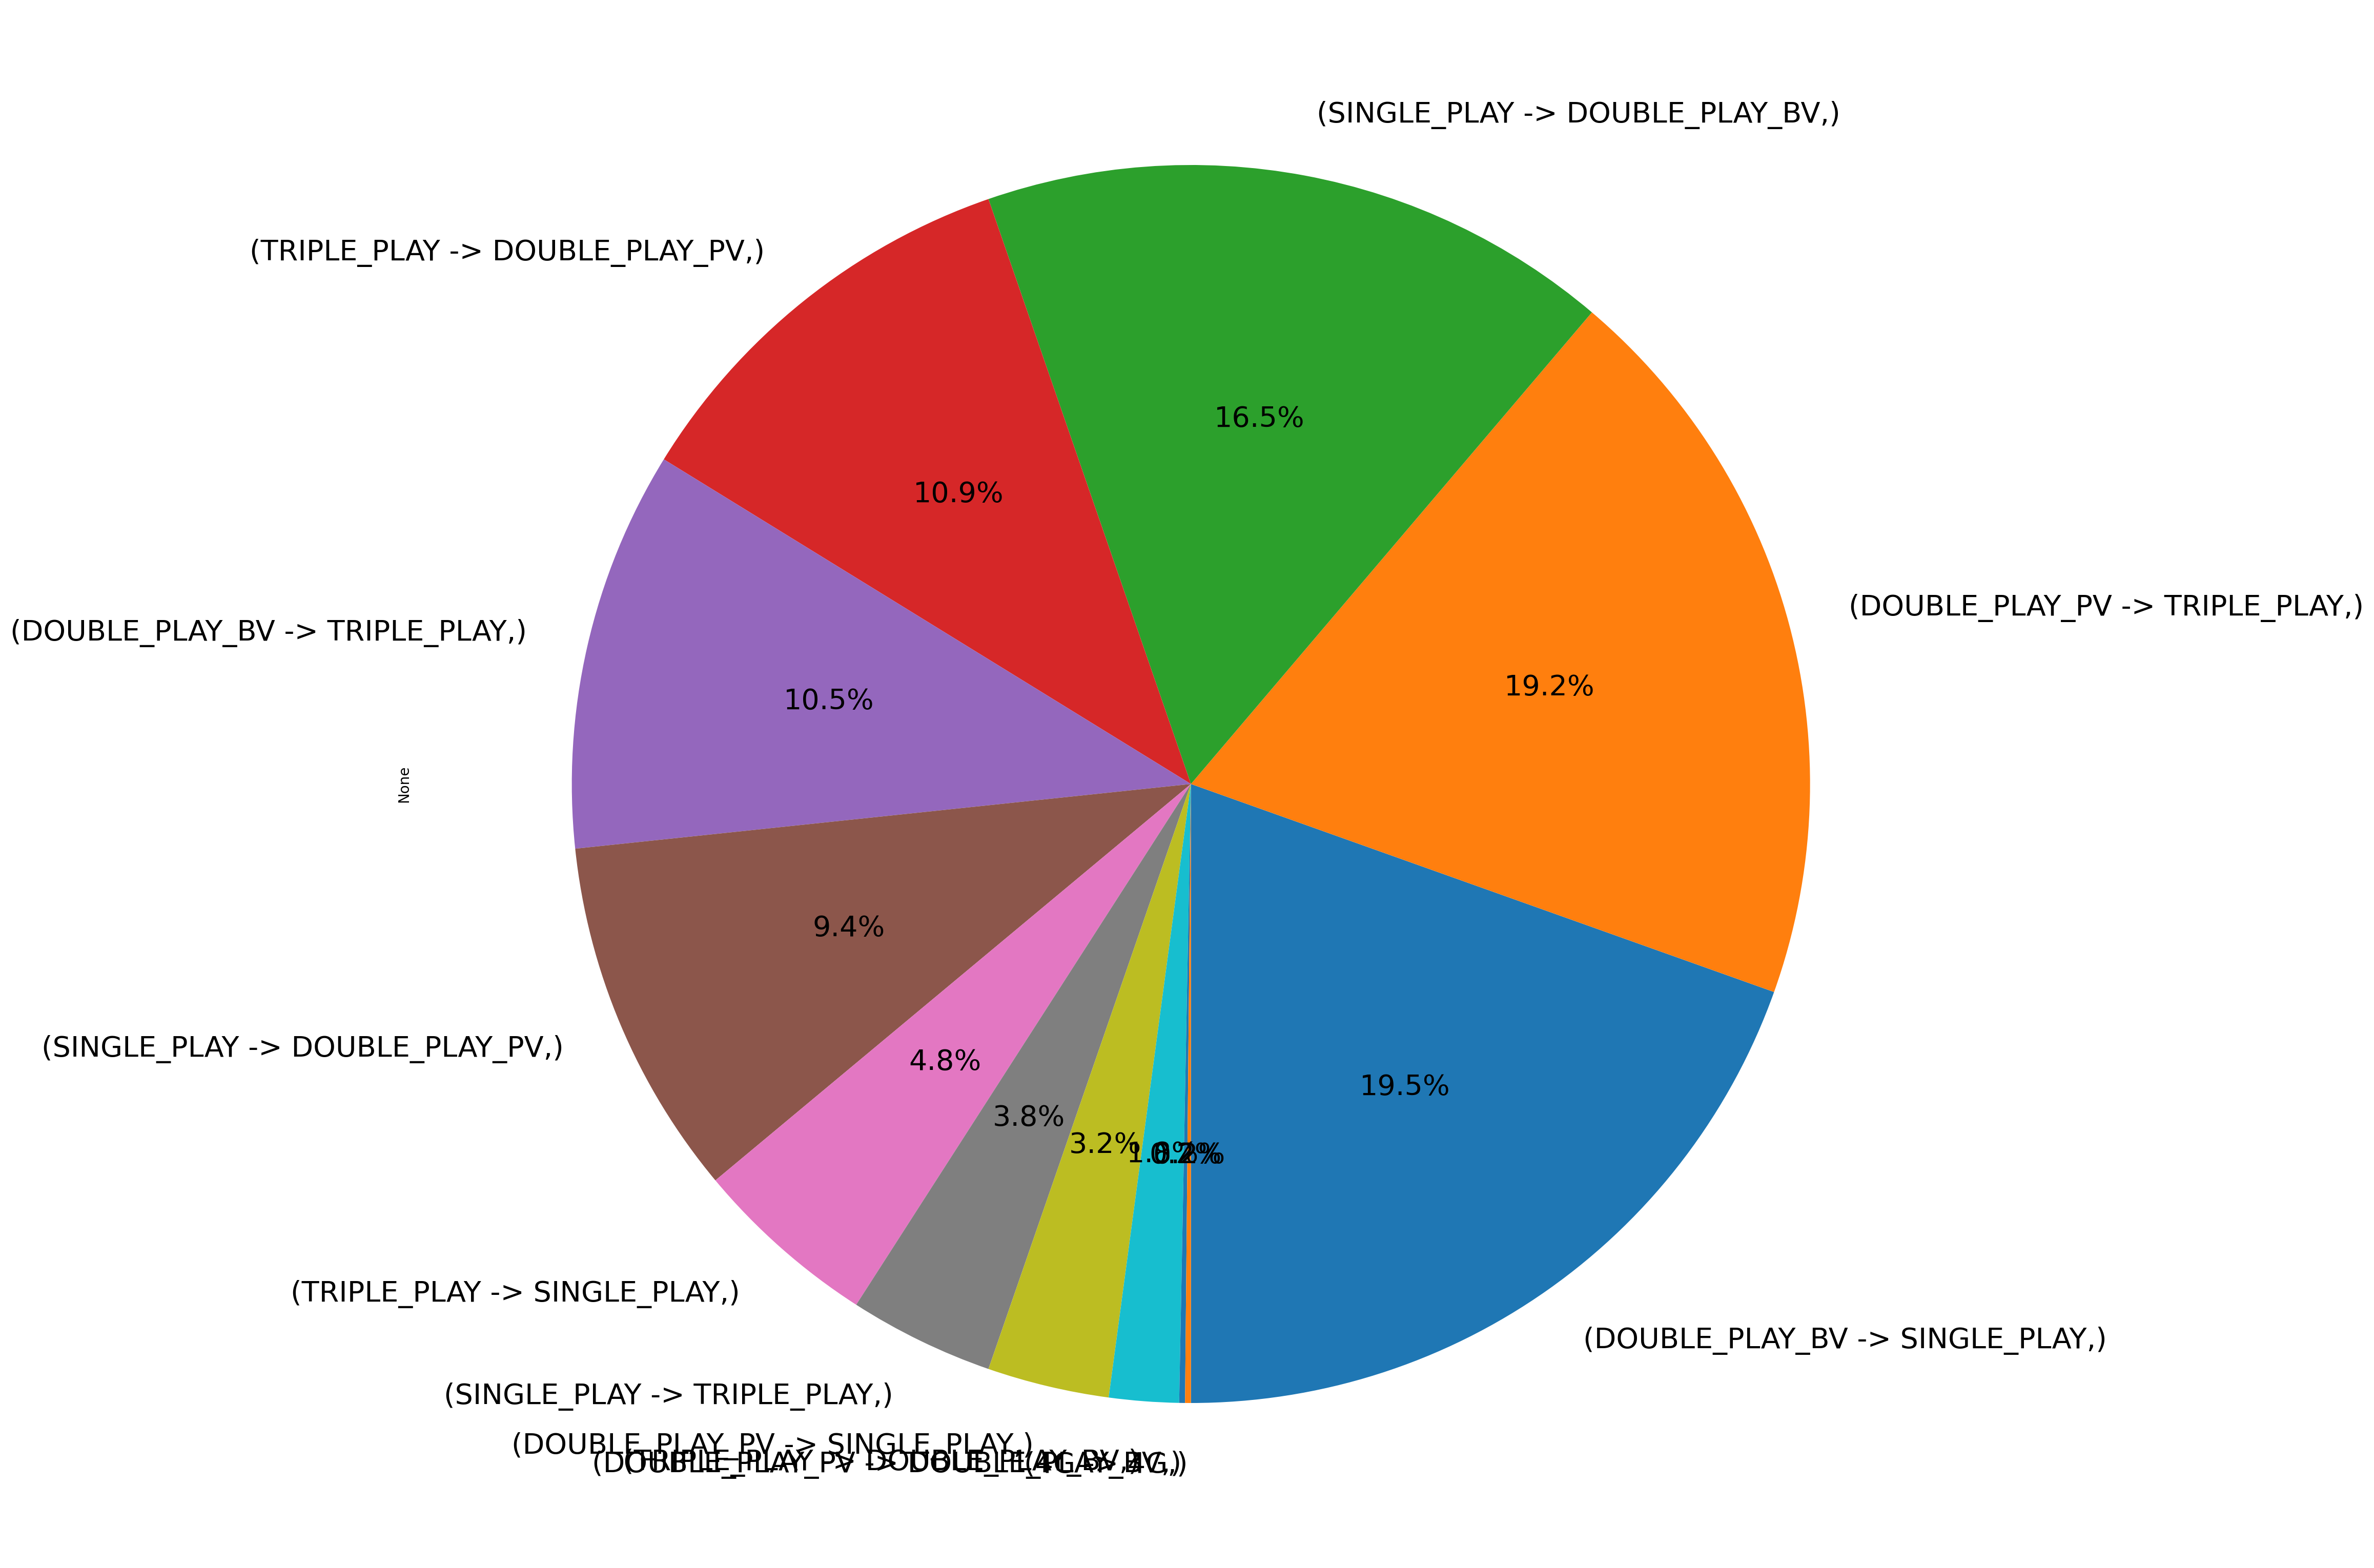

In [1176]:
fig = plt.figure(figsize=(20,20), dpi=200)
ax = plt.subplot(111)

usage_df[["Sub_Update"]].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=270, fontsize=20)

### Customers with VAS

In [1177]:
usage_df.apply(lambda x: "YES" if  type(x["VAS_Package"]) == str else "NO", axis=1).value_counts()

YES    1773
NO     1143
dtype: int64

## Customers with Megaline Packages

In [1178]:
usage_df.apply(lambda x: "YES" if  type(x["Megaline_Package"]) == str else "NO", axis=1).value_counts()

YES    2836
NO       80
dtype: int64

## Customers with FTTH Package

In [1179]:
usage_df.apply(lambda x: "YES" if  type(x["FTTH_Package"]) == str else "NO", axis=1).value_counts()

NO     2828
YES      88
dtype: int64

## Customers with PeoTV Packages

In [1180]:
peo_tv_users = usage_df.apply(lambda x: "YES" if  type(x["Peo_TV_Package"]) == str else "NO", axis=1)
peo_tv_users.value_counts()

NO     1774
YES    1142
dtype: int64